# Multiple Linear Regression

**Analyze diamonds dataset**

     - Carat, depth, table, x, y, z as numerical independent variable
     - Cut, color, clarity as categorical independent variable
     - Price as dependent variable

- Analyze the relationship
- Apply Multiple Linear Regression with dummy variable
- Perform Simultant Test and Partial Test
- Check the assumptions
- Interpret the result
- Use α 5% (α = 0.05)

**Try to find the best model without any multicollinearity, or at least the least one.**


In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## **Dataset info**
https://www.kaggle.com/drvader/diamonds-dataset-exploration-and-regression/data

A data frame with 53940 rows and 10 variables:

1. price<br>
price in US dollars (\$326--\$18,823)
<br><br>
2. carat<br>
weight of the diamond (0.2--5.01)
<br><br>
3. cut<br>
quality of the cut (Fair, Good, Very Good, Premium, Ideal)
<br><br>
4. color<br>
diamond colour, from J (worst) to D (best)
<br><br>
5. clarity<br>
a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
<br><br>
6. x<br>
length in mm (0--10.74)
<br><br>
7. y<br>
width in mm (0--58.9)
<br><br>
8. z<br>
depth in mm (0--31.8)
<br><br>
9. depth<br>
total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
<br><br>
10. table<br>
width of top of diamond relative to widest point (43--95)

In [28]:
# Load dataset
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [29]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [30]:
# Check numerical features statistical description
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [31]:
# Check numerical features correlation
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


## **Create dummy variables**

In [32]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head()

,carat,depth,table,price,x,y,z,cut_Premium,cut_Very Good,cut_Good,...,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,1,...,0,0,1,0,0,0,0,0,1,0


## **Check correlation**

In [33]:
df_dummy.corr()

,carat,depth,table,price,x,y,z,cut_Premium,cut_Very Good,cut_Good,...,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.116245,0.009568,0.034196,...,0.102465,0.161494,0.180054,-0.167571,-0.137024,-0.063094,-0.038904,0.062669,0.267483,0.120983
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,-0.198306,0.025828,0.136114,...,0.026037,0.022630,0.022543,-0.023477,-0.019243,-0.024169,-0.009459,0.040899,0.007202,0.081135
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.338072,0.119971,0.175174,...,0.011574,0.017967,0.037253,-0.069103,-0.062273,-0.026858,-0.009655,0.051959,0.095344,0.044716
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.095706,0.006593,-0.000312,...,0.059223,0.097125,0.081710,-0.095266,-0.052381,-0.009886,-0.001062,0.008957,0.128420,-0.000255
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.126820,0.004569,0.030349,...,0.095896,0.146522,0.164658,-0.185253,-0.147151,-0.059882,-0.035507,0.079241,0.270827,0.108361
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.107943,0.016699,0.032187,...,0.093480,0.142895,0.160776,-0.179271,-0.141624,-0.056490,-0.035928,0.076097,0.263252,0.100736
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.090019,0.016039,0.045169,...,0.095041,0.145276,0.164217,-0.182401,-0.144746,-0.058513,-0.036314,0.081005,0.263192,0.111913
cut_Premium,0.116245,-0.198306,0.338072,0.095706,0.126820,0.107943,0.090019,1.000000,-0.314877,-0.185385,...,0.027895,0.005899,0.017231,-0.053852,-0.061949,-0.011866,0.022611,0.023275,0.067623,0.005676
cut_Very Good,0.009568,0.025828,0.119971,0.006593,0.004569,0.016699,0.016039,-0.314877,1.000000,-0.169940,...,-0.004437,-0.001549,0.009816,-0.005251,0.015284,-0.006849,-0.016412,0.032547,0.004806,-0.031317
cut_Good,0.034196,0.136114,0.175174,-0.000312,0.030349,0.032187,0.045169,-0.185385,-0.169940,1.000000,...,-0.009517,0.006187,0.014977,-0.037564,-0.038627,-0.017116,-0.021063,0.055938,0.041970,0.015844


In [34]:
df_dummy.corr()['price']

carat            0.921591
depth           -0.010647
table            0.127134
price            1.000000
x                0.884435
y                0.865421
z                0.861249
cut_Premium      0.095706
cut_Very Good    0.006593
cut_Good        -0.000312
cut_Fair         0.018728
color_E         -0.101089
color_F         -0.024161
color_G          0.008556
color_H          0.059223
color_I          0.097125
color_J          0.081710
clarity_VVS1    -0.095266
clarity_VVS2    -0.052381
clarity_VS1     -0.009886
clarity_VS2     -0.001062
clarity_SI1      0.008957
clarity_SI2      0.128420
clarity_I1      -0.000255
Name: price, dtype: float64

## **Select features**

In [35]:
df_dummy.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Premium',
       'cut_Very Good', 'cut_Good', 'cut_Fair', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_VVS1',
       'clarity_VVS2', 'clarity_VS1', 'clarity_VS2', 'clarity_SI1',
       'clarity_SI2', 'clarity_I1'],
      dtype='object')

### **Intrepretasi**

**x, y, z tidak digunakan sebagai inputan model karena memiliki korelasi yang tinggi dengan carat.**

In [36]:
# Membuat model OLS
feature = ['carat', 'depth', 'table', 'cut_Premium',
       'cut_Very Good', 'cut_Good', 'cut_Fair', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_VVS1',
       'clarity_VVS2', 'clarity_VS1', 'clarity_VS2', 'clarity_SI1',
       'clarity_SI2', 'clarity_I1']

target = 'price' 

# model
sm_lm = sm.OLS(df_dummy[target], sm.add_constant(df_dummy[feature]))

# fiting model
result = sm_lm.fit()

In [37]:
# summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 2.942e+04
Date:                Wed, 23 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:48:37   Log-Likelihood:            -4.5696e+05
No. Observations:               53940   AIC:                         9.140e+05
Df Residuals:                   53919   BIC:                         9.141e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1726.6343    353.750      4.881

## **Cek Multicollinearity**

In [38]:
# Function to calculate VIF
def calc_vif(x):
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['Acceptable'] = np.where(vif.VIF < 4, 'Yes-----', 'No') 
    return (vif) 

In [39]:
calc_vif(df_dummy[feature])

,variables,VIF,Acceptable
0,carat,5.058884,No
1,depth,488.274537,No
2,table,504.543202,No
3,cut_Premium,2.101165,Yes-----
4,cut_Very Good,1.715990,Yes-----
5,cut_Good,1.325492,Yes-----
6,cut_Fair,1.137652,Yes-----
7,color_E,2.453896,Yes-----
8,color_F,2.439408,Yes-----
9,color_G,2.770610,Yes-----


### **Intrepretasi**

Dari hasil perhitungan nilai VIF di atas, dapat dilihat bahwa masih terdapat multicollinearity. Feature seperti **depth** dan **table** memiliki nilai VIF yang sangat tinggi. Oleh karena itu, kita coba untuk men-drop 2 fitur tersebut.

In [40]:
# Membuat model OLS dengan men-drop fitur depth dan table

feature = ['carat', 'cut_Premium',
       'cut_Very Good', 'cut_Good', 'cut_Fair', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_VVS1',
       'clarity_VVS2', 'clarity_VS1', 'clarity_VS2', 'clarity_SI1',
       'clarity_SI2', 'clarity_I1']

target = 'price' 

sm_lm = sm.OLS(df_dummy[target], sm.add_constant(df_dummy[feature]))

result = sm_lm.fit()

In [41]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 3.264e+04
Date:                Wed, 23 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:48:47   Log-Likelihood:            -4.5699e+05
No. Observations:               53940   AIC:                         9.140e+05
Df Residuals:                   53921   BIC:                         9.142e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -944.9009     31.395    -30.098

In [42]:
# result.params

In [43]:
df.groupby('cut').mean()['price'].sort_values()

cut
Ideal        3457.541970
Good         3928.864452
Very Good    3981.759891
Fair         4358.757764
Premium      4584.257704
Name: price, dtype: float64

In [44]:
df.groupby('color').mean()['price'].sort_values()

color
E    3076.752475
D    3169.954096
F    3724.886397
G    3999.135671
H    4486.669196
I    5091.874954
J    5323.818020
Name: price, dtype: float64

In [45]:
df.groupby('clarity').mean()['price'].sort_values()

clarity
VVS1    2523.114637
IF      2864.839106
VVS2    3283.737071
VS1     3839.455391
I1      3924.168691
VS2     3924.989395
SI1     3996.001148
SI2     5063.028606
Name: price, dtype: float64

In [46]:
calc_vif(df_dummy[feature])

,variables,VIF,Acceptable
0,carat,4.962334,No
1,cut_Premium,1.707656,Yes-----
2,cut_Very Good,1.578982,Yes-----
3,cut_Good,1.254927,Yes-----
4,cut_Fair,1.130454,Yes-----
5,color_E,2.155595,Yes-----
6,color_F,2.103389,Yes-----
7,color_G,2.313496,Yes-----
8,color_H,2.038003,Yes-----
9,color_I,1.744264,Yes-----


### **Intrepretasi**

Dari hasil perhitungan nilai VIF di atas, terlihat hanya carat yang memiliki nilai VIF di atas 4.

### Output to interpret

1. Adjusted R-square
2. Prob (F-statistics)
3. Prob (t-test) B0, B1, B2
4. Coef B0, B1, B2

**1. Adjusted R-square = 0.916**

- artinya model dapat menjelaskan variasi dari nilai price sebesar 91.6%, sisanya 8.4% dijelaskan oleh variable lain yang tidak terdapat dalam model ini

**2. Prob (F-statistic) = 0.00**

- P value < 0.05, reject Ho artinya minimal salah satu variable X ada yang berpengaruh secara signifikan terhadap price (variable Y)

**3. Prob B0, B1, B2**

- B0  P-value = 0.000, P value < 0.05, reject Ho artinya model ini butuh intercept
- B1  P-value = 0.000, P value < 0.05, reject Ho artinya carat berpengaruh positif secara signifikan terhadap price (variable Y)
- .
- .
- B18 P-value = 0.000, P value < 0.05, reject Ho artinya clarity_I1 berpengaruh negatif secara signifikan terhadap price (variable Y)


**4. Coeff B0,B1,B2,....,B18**

- Coeff (intercept)     B0 = -944.900873 ---> Nilai price adalah 0.59 ketika semua variable bernilai 0
- Coeff (carat)         B1 = 8886.128883 ---> setiap kenaikan carat 1 carat, maka price akan naik 8886 dollar 

- Coeff (cut_Premium)   B2 = -128.858535 ---> rata-rata price cut_Premium lebih kecil 128 dollar dari pada cut_Ideal
- Coeff (cut_Very Good) B3 = -149.537561 ---> rata-rata price cut_Very Good lebih kecil 149 dollar dari pada cut_Ideal

- Coeff (color_E)       B6 = -211.682481 ---> rata-rata price color_E lebih kecil 211 dollar dari pada color_D.
- Coeff (color_F)       B7 = -303.310033 ---> rata-rata price color_F lebih kecil 303 dollar dari pada color_D.

- Coeff (clarity_VVS1)  B12 = -347.619200 ---> rata-rata price clarity_VVS1 lebih kecil 347 dollar dari pada clarity_IF
- Coeff (clarity_VVS2)  B13 = -452.447435 ---> rata-rata price clarity_VVS2 lebih kecil 452 dollar dari pada clarity_IF


**Catatan**

- Interpretasi berlaku hanya pada rentang tertentu (lihat dgn describe)

---

### **Coba-Coba**

Sekarang, mari kita coba untuk mencoba berbagai kombinasi, yaitu yang pertama dengan men-drop fitur cut, dan yang kedua dengan men-drop fitur clarity.

In [47]:
# Membuat model OLS dengan men-drop fitur cut
# feature = ['cut_Premium',
#        'cut_Very Good', 'cut_Good', 'cut_Fair', 'color_E', 'color_F',
#        'color_G', 'color_H', 'color_I', 'color_J', 'clarity_VVS1',
#        'clarity_VVS2', 'clarity_VS1', 'clarity_VS2', 'clarity_SI1',
#        'clarity_SI2', 'clarity_I1']

# target = 'price' 

# sm_lm = sm.OLS(df_dummy[target], sm.add_constant(df_dummy[feature]))
# result = sm_lm.fit()

In [48]:
# print(result.summary())

In [49]:
# calc_vif(df_dummy[feature])

### **Intrepretasi**

- Ternyata, dengan men-drop fitur carat, kita mendapatkan nilai VIF di bawah 4 semua.
- Tapi Adj R-square terlalu kecil 0.066
- Jadi kita tetap pakai feature carat

---

## **Cek Normalitas Residual**

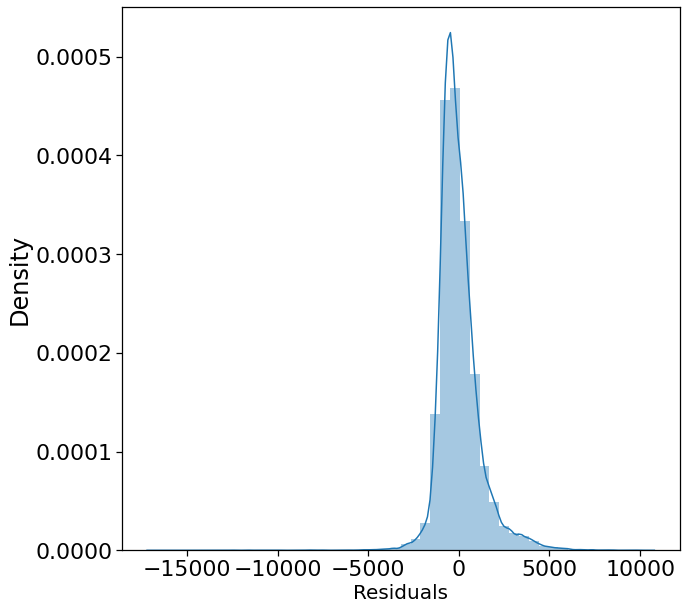

In [50]:
plt.figure(figsize=(10,10))
sns.set_context('notebook', font_scale=2)
sns.distplot(result.resid)
plt.xlabel('Residuals', fontsize = 20);

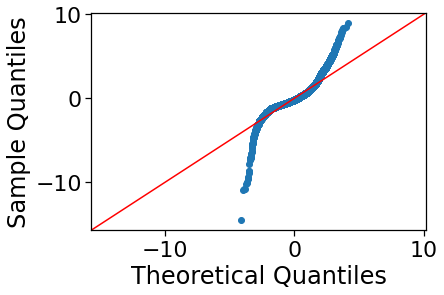

In [51]:
# Cek dengan menggunakan QQ plot
sm.qqplot(result.resid, line = '45', fit=True);

### **Interpretasi**

Kalau residualnya mengikuti garis merah 45 derajat, berarti residualnya mengikuti distribusi normal.

Tidak disarankan untuk menggunakan normal test pada dataset yang besar, karena pada dataset yang besar, hasil dari normaltest menjadi tidak dapat dipercaya karena hasilnya akan disimpulkan menjadi tidak normal. Jadi, lebih baik menggunakan visualisasi.

## **Cek Asumsi Gauss-Markov**

Yang dilihat adalah errornya. Dengan asumsi:

* Rata-rata error pada populasi adalah nol. 
* Error tidak berkorelasi dengan error lainnya.
* Error memiliki ragam yang homogen.

![](https://condor.depaul.edu/sjost/it223/documents/resid-plots.gif)

In [52]:
xx

NameError: name 'xx' is not defined

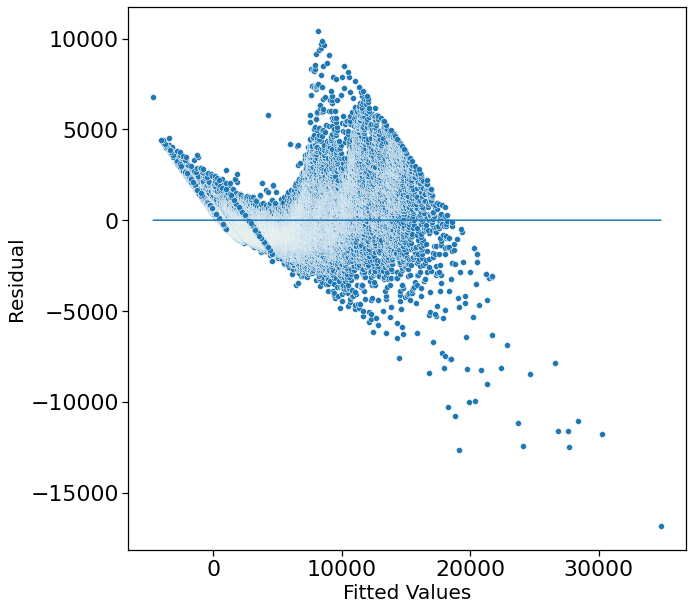

In [53]:
plt.figure(figsize=(10,10))
sns.set_context('notebook', font_scale=2)

sns.scatterplot(result.fittedvalues, result.resid)
sns.lineplot(result.fittedvalues, 0)

plt.xlabel('Fitted Values', fontsize=20)
plt.ylabel('Residual', fontsize=20);

### **Interpretasi**

Asumsi Normality
 
Jika melihat dari histogram, residual terlihat simetris, namun sangat menjulang (kurtosis tinggi). Setelah divalidasi dengan menggunakan QQ-plot, terlihat persebaran residualnya tidak mengikuti garis 45 derajat. Ini berarti, asumsi normalitas tidak terpenuhi.

Asumsi Gauss-Markov
1. Residual tersebar di sekitar 0. Terpenuhi.
2. Uncorrelated error. Tidak terpenuhi. --> Kalau berdasarkan gambar referensi, plot residual bersifat **bias**  
3. Homoscedasticity. Terpenuhi

Dengan kata lain, meskipun tidak terdapat multicollinearity (nilai VIF terpenuhi) dan juga adj. r-squared yang tinggi, namun kita tidak bisa terlalu percaya pada hasil prediksi yang diberikan oleh model. Hal ini disebabkan oleh adanya beberapa asumsi model linear regresi yang tidak terpenuhi, sehingga output model menjadi bias.